In [ ]:
!pip install -q scikit-learn pandas matplotlib seaborn


In [34]:
import pandas as pd

df = pd.read_csv("paddydataset.csv")
df.head()


,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,...,Wind Direction_D1_D30,Wind Direction_D31_D60,Wind Direction_D61_D90,Wind Direction_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg)
0,6,Cuddalore,CO_43,alluvial,150,75.0,dry,120,6,240,...,SW,W,NNW,WSW,72.0,78,88,85,540,35028
1,6,Kurinjipadi,ponmani,clay,150,75.0,wet,120,6,240,...,NW,S,SE,SSE,64.6,85,84,87,600,35412
2,6,Panruti,delux ponni,alluvial,150,75.0,dry,120,6,240,...,ENE,NE,NNE,W,85.0,96,84,79,600,36300
3,6,Kallakurichi,CO_43,clay,150,75.0,wet,120,6,240,...,W,WNW,SE,S,88.5,95,81,84,540,35016
4,6,Sankarapuram,ponmani,alluvial,150,75.0,dry,120,6,240,...,SSE,W,SW,NW,72.7,91,83,81,600,34044


In [ ]:
df = pd.read_csv("paddydataset.csv")


In [ ]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hectares                            2789 non-null   int64  
 1   Agriblock                           2789 non-null   object 
 2   Variety                             2789 non-null   object 
 3   Soil Types                          2789 non-null   object 
 4   Seedrate(in Kg)                     2789 non-null   int64  
 5   LP_Mainfield(in Tonnes)             2789 non-null   float64
 6   Nursery                             2789 non-null   object 
 7   Nursery area (Cents)                2789 non-null   int64  
 8   LP_nurseryarea(in Tonnes)           2789 non-null   int64  
 9   DAP_20days                          2789 non-null   int64  
 10  Weed28D_thiobencarb                 2789 non-null   int64  
 11  Urea_40Days                         2789 no

,0
Hectares,0
Agriblock,0
Variety,0
Soil Types,0
Seedrate(in Kg),0
LP_Mainfield(in Tonnes),0
Nursery,0
Nursery area (Cents),0
LP_nurseryarea(in Tonnes),0
DAP_20days,0


In [ ]:
df = df.dropna()


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:

X = df.drop(columns=["Paddy yield(in Kg)"])
y = df["Paddy yield(in Kg)"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop("Paddy yield(in Kg)", axis=1)
y = df["Paddy yield(in Kg)"]

categorical_cols = X.select_dtypes(include=['object']).columns

numeric_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop("Paddy yield(in Kg)", axis=1)
y = df["Paddy yield(in Kg)"]

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model başarıyla çalıştı!")



Model başarıyla çalıştı!


In [ ]:
y_pred_lr = model.predict(X_test)


In [37]:
import pandas as pd

results_lr = {
    "Model": ["Linear Regression"],
    "MAE": [mae_lr],
    "RMSE": [rmse_lr],
    "R2 Score": [r2_lr]
}

df_results_lr = pd.DataFrame(results_lr)
df_results_lr



,Model,MAE,RMSE,R2 Score
0,Linear Regression,698.319228,927.935976,0.989384


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [27]:
print("===========RANDOM FOREST SONUÇLARI============")
print(f"MAE       : {mae_rf:.2f}")
print(f"RMSE      : {rmse_rf:.2f}")
print(f"R2 Score  : {r2_rf:.4f}")



===========RANDOM FOREST SONUÇLARI============
MAE       : 632.21
RMSE      : 887.21
R2 Score  : 0.9903


In [ ]:
print("=== KARŞILAŞTIRMA TABLOSU ===")
print("LR  -> R2:", r2_lr, "RMSE:", rmse_lr)
print("RF  -> R2:", r2_rf, "RMSE:", rmse_rf)


=== KARŞILAŞTIRMA TABLOSU ===
LR  -> R2: 0.9893839755066542 RMSE: 927.9359757024167
RF  -> R2: 0.990295442349034 RMSE: 887.2069366828164


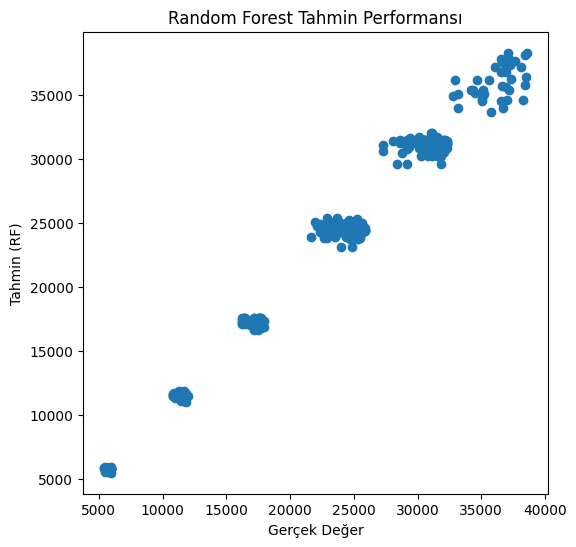

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Gerçek Değer")
plt.ylabel("Tahmin (RF)")
plt.title("Random Forest Tahmin Performansı")
plt.show()


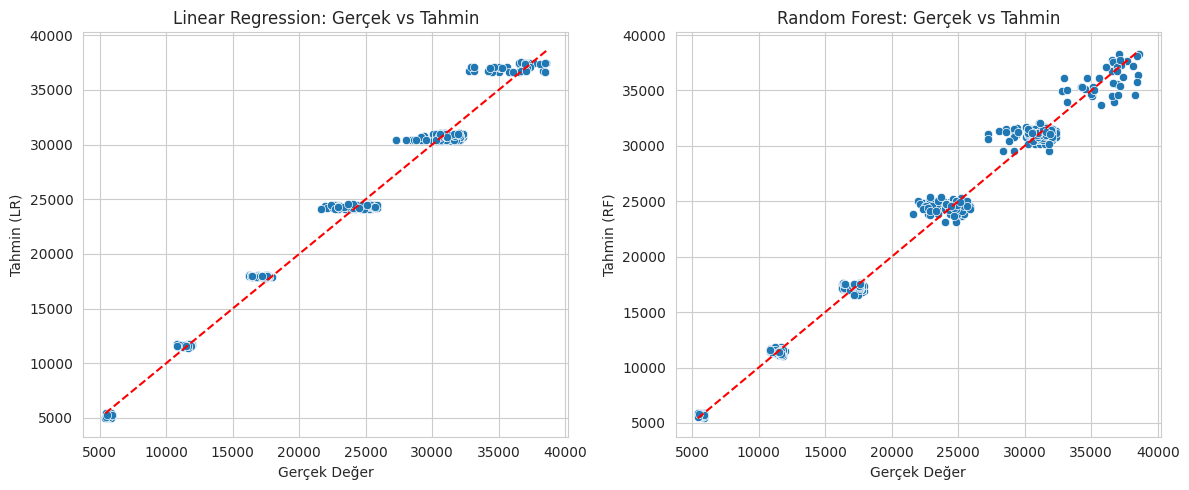

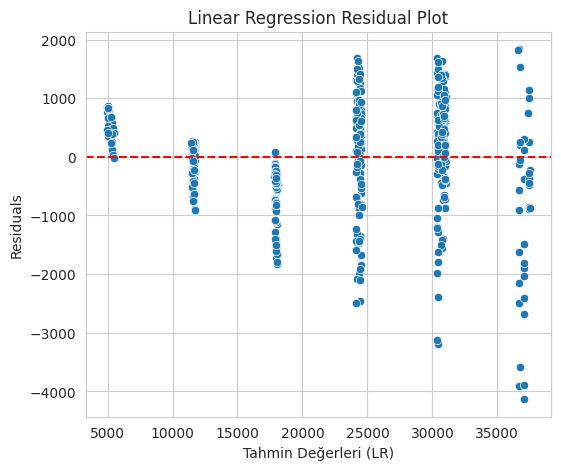

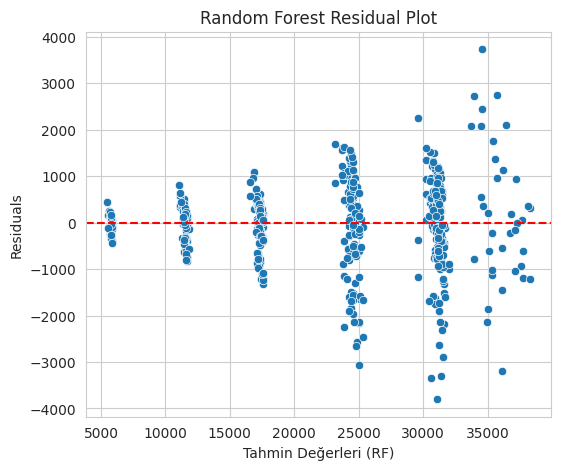

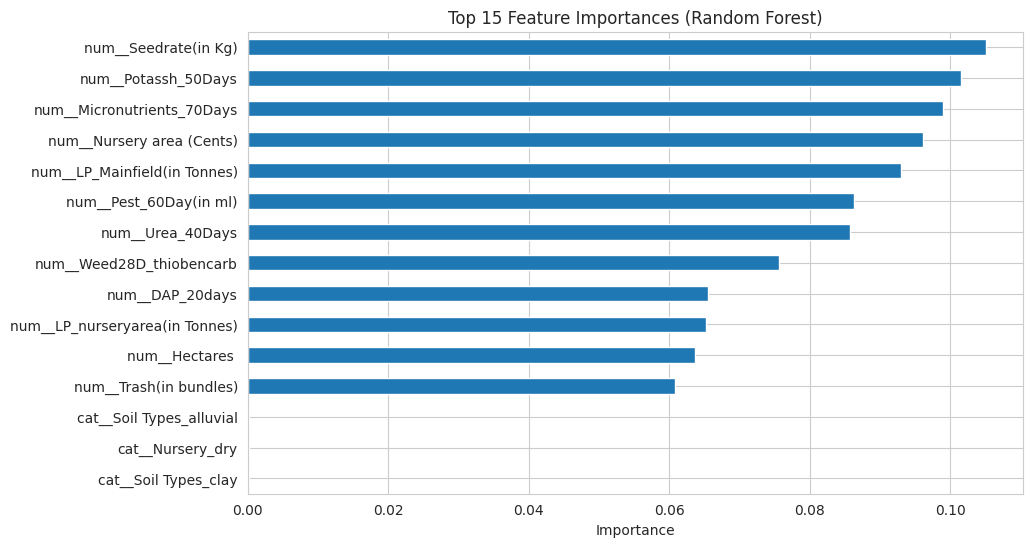

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6,5)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Gerçek Değer")
plt.ylabel("Tahmin (LR)")
plt.title("Linear Regression: Gerçek vs Tahmin")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° çizgi

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Gerçek Değer")
plt.ylabel("Tahmin (RF)")
plt.title("Random Forest: Gerçek vs Tahmin")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° çizgi
plt.tight_layout()
plt.show()

residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Tahmin Değerleri (LR)")
plt.ylabel("Residuals")
plt.title("Linear Regression Residual Plot")
plt.show()

residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Tahmin Değerleri (RF)")
plt.ylabel("Residuals")
plt.title("Random Forest Residual Plot")
plt.show()

feat_imp = model_rf.named_steps['regressor'].feature_importances_
feat_names = model_rf.named_steps['preprocessor'].get_feature_names_out()

feat_imp_series = pd.Series(feat_imp, index=feat_names).sort_values(ascending=False)[:15]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
feat_imp_series.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

